<a href="https://colab.research.google.com/github/miguelsmachado/data_science/blob/master/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://github.com/miguelsmachado/py_projects/blob/master/banner.png?raw=true)

#### **Data Science na Prática 2.0**
*by [Miguel S. Machado](https://www.linkedin.com/in/miguel-s-machado/)*

---
  

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

Antes de falarmos sobre a obtenção dos dados, é muito importante entender que estamos vivendo um momento impar da nossa geração. Muitos de nós não estavam preparados para um evento como esse. Dessa forma, muitas fontes de dados também não conseguem acompanhar o ritmo da doença. E isso não é um problema só do Brasil. Podemos dizer que o mundo está despadronizado em relação aos processos de análise e geração de dados. Cada lugar usa um procedimento diferente, alguma fontes são oficiais, outras não, e ainda temos os poblemas políticos sobre a disponibilização de dados em alguns paises.

Feito essa introdução, ainda antes de falarmos dos dados, é importante entender que estamos escolhendo uma fonte e analisando os seus levantamentos até o dia de hoje (16 de junho de 2020). Podem haver diferenças entre outras fontes de dados.

Nós utilzaremos os dados disponilizados pela [Our World in Data](https://ourworldindata.org).

"Our World In Data (Nosso Mundo em Dados, em tradução literal) é uma publicação digital especializada em expor pesquisas empíricas e dados analíticos sobre mudanças nas condições de qualidade de vida ao redor do mundo. A publicação especializa-se em criar visualizações de dados interativas, principalmente gráficos e mapas, além de análises críticas sobre o que impulsiona o desenvolvimento, os fatores que levam as mudanças observadas e suas consequências no mundo." *Wikipedia*


### Dicionário de Variáveis
Para que possa ser melhor compreendido o significado do nosso DataSet, vamos dar uma olhada o que significa cada coluna:

Coluna|Descrição|
------|---------|
`iso_code`|ISO 3166-1 alpha-3 – código dos países
`continent`|Continente do país
`location`|Localização geográfica
`date`|Data da observação
`total_cases`|Total de casos confirmados de COVID-19
`new_cases`|Novos casos confirmados de COVID-19
`total_deaths`|Total de mortes atribuídas ao COVID-19
`new_deaths`|Novas mortes atribuídas ao COVID-19
`total_cases_per_million`|Total de casos confirmados de COVID-19 por 1.000.000 de pessoas
`new_cases_per_million`|Novos casos confirmados de COVID-19 por 1.000.000 de pessoas
`total_deaths_per_million`|Total de mortes atribuídas ao COVID-19 por 1.000.000 de pessoas
`new_deaths_per_million`|Novas mortes atribuídas ao COVID-19 por 1.000.000 de pessoas
`total_tests`|Total de testes para COVID-19
`new_tests`|Novos testes para COVID-19
`new_tests_smoothed`|Novos testes para COVID-19 (Aproximado dos últimos 7 dias).<br> Para países que não reportam diariamentes seus testes à base ,<br>de dados nós assumimos que os valores mantém um padrão<br> durante o período em que não foram reportados.
`total_tests_per_thousand`|Total de testes para COVID-19 para cada 1.000 pessoas
`new_tests_per_thousand`|Novos testes para COVID-19 para cada 1.000 pessoas
`new_tests_smoothed_per_thousand`|Novos testes para COVID-19 (proximado dos últimos 7 dias),<br> para cada 1.000 pessoas
`tests_units`|Unidade usada pelo país para reportar os dados dos teste
`stringency_index`|Índice de Estresse da Resposta do Governo: medida composta baseada em 9<br> indicadores de resposta, incluindo fechamento de escolas, fechamento de<br> locais de trabalho e proibições de viagens, redimensionados para um valor <br>de 0 a 100 (100 = resposta mais estrita)
`population`|População em 2020
`population_density`|Número de habitantes divido pela áerea do país, medido em kilometros quadrados
`median_age`|Idade média da população
`aged_65_older`|Porcentagem da população acima de 65 anos
`aged_70_older`|Porcentagem da população acima de 70 anos
`gdp_per_capita`|Produto interno bruto em relação ao poder de compra
`extreme_poverty`|Porcentagem do população que vive em extrema pobreza
`cvd_death_rate`|Taxa de mortes por doenças cardiovascular em 2017
`diabetes_prevalence`|Diabéticos (% da população entre 20 e 79 anos) em 2017
`female_smokers`|Porcentagem de mulheres que fumam
`male_smokers`|Porcentagem de homens que fumam
`handwashing_facilities`|Porcentagem da população com saneamento básico mínimo para lavar as mãos
`hospital_beds_per_thousand`|Leitos hospitalares para cada 1.000 pessoas
`life_expectancy`|Expectativa de vida em 2019

### Importando os dados do COVID-19

Iniciaremos nosso estudo fazendo as importações das bibliotecas necessárias e lendo o nosso dataset do portal *Our World in Data*

In [168]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

##Análise inicial do conjunto de dados

Antes de iniciar qualquer análise, vamos ver alguns dados básicos quanto ao tamanho, tipo de variáveis e % de dados faltantes.

Vamos fazer uma leitura inical para ver se nossa importação está correta e como é o nosso DataFrame

In [8]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [4]:
print(f"O nosso DataFrame possui {df.shape[0]} entradas e {df.shape[1]} colunas")

O nosso DataFrame possui 24443 entradas e 34 colunas


In [5]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

Nosso dataframe possui quase 25.000 entradas, essas entradas estão dividadas por países e por dia. Vamos calcular quantas localizações são estudadas:

In [15]:
print("Abaixo podemos ver todos os países estudados nesse DataFrame:\n")
df['location'].unique()

Abaixo podemos ver todos os países estudados nesse DataFrame:



array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

In [18]:
# Vamos subtrair 2 nessa conta, pois 'International' e 'World' não são paises
print(f"O DataFrame estuda {len(df['location'].unique()) - 2} diferentes localizações.")

O DataFrame estuda 210 diferentes localizações.


Agora vamos fazer uma análise mais técnica e ver quais os tipos de dados que temos:

In [22]:
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Agora vamos ver, quantos desses dados são nulos:

In [30]:
print("Porcentagem de dados nulos:\n")
round(df.isnull().sum().sort_values(ascending=False)/df.shape[0] * 100, 2)

Porcentagem de dados nulos:



new_tests                          75.68
new_tests_per_thousand             75.68
total_tests_per_thousand           72.91
total_tests                        72.91
new_tests_smoothed_per_thousand    70.65
new_tests_smoothed                 70.65
tests_units                        68.15
handwashing_facilities             59.57
extreme_poverty                    40.20
male_smokers                       27.88
female_smokers                     27.05
stringency_index                   20.50
hospital_beds_per_thousand         16.95
aged_65_older                      10.75
gdp_per_capita                     10.47
aged_70_older                       9.95
median_age                          9.49
cvd_death_rate                      9.40
diabetes_prevalence                 6.47
population_density                  4.27
life_expectancy                     1.38
new_deaths_per_million              1.15
total_deaths_per_million            1.15
new_cases_per_million               1.15
total_cases_per_

Nosso dateset possui muitos dados faltantes, 8 deles com mais de 50% de dados faltantes.

Isso tem que ser análisado com cuidado, pois dependendo do trabalho que formos fazer, o resultado pode ser influênciado por isso. E nessa proporção, devemos ter muita couidado com o procedimento com essa varíavel! É um número muito alto para ser completado com outros valores.

Vamos buscar fazer uma análise utilizando os dados que temos mais completos. São esses: os números de casos, os número de mortes, as localizações e as estatísticas populacionais dos países.

## Análise dos Dados


Antes de iniciar nossa análise, vamos ajustar a coluna date para coloca-la no formato `datetime`do pandas. Isso é muito útil para facilitar a análise em relação ao tempo.

In [34]:
df.date = pd.to_datetime(df.date)

Apesar de não ser uma informação agradável, vamos iniciar verificando no dia de hoje quais os países que possuem o maior número de casos.

In [87]:
df_reduzido_casos = df[['location', 'total_cases']].loc[df.date == '2020-06-17'].sort_values(by='total_cases',
                                                                         ascending=False)[1:].head(10)
df_reduzido_casos

,location,total_cases
23272,United States,2137731.0
3320,Brazil,923189.0
18485,Russia,545458.0
10321,India,354065.0
23102,United Kingdom,298136.0
11420,Italy,237500.0
17517,Peru,237156.0
10654,Iran,192439.0
8594,Germany,187184.0
4673,Chile,184449.0


Vamos analisar esses mesmos dados de uma forma diferente. Vamos ver a porcentagem de casos que cada país tem quando comparado ao mundo todo.

In [92]:
df[['location', 'total_cases']].loc[df.date == '2020-06-17'].sort_values(by='total_cases', ascending=False)[:1]

,location,total_cases
24378,World,8142129.0


In [88]:
df_reduzido_casos['porcentagem_casos'] = round((df_reduzido['total_cases'] / 8142129) * 100, 2)
df_reduzido_casos

,location,total_cases,porcentagem_casos
23272,United States,2137731.0,26.26
3320,Brazil,923189.0,11.34
18485,Russia,545458.0,6.70
10321,India,354065.0,4.35
23102,United Kingdom,298136.0,3.66
11420,Italy,237500.0,2.92
17517,Peru,237156.0,2.91
10654,Iran,192439.0,2.36
8594,Germany,187184.0,2.30
4673,Chile,184449.0,2.27


Com essa nova coluna, fica mais esclarecedor para nós, o quanto significa esse número comparado ao mundo.

Vamos fazer o mesmo estudo para o número de mortes:

In [98]:
df_reduzido_mortes = df[['location', 'total_deaths']].loc[df.date == '2020-06-17'].sort_values(by='total_deaths',
                                                                         ascending=False)[1:].head(10)
df_reduzido_mortes

,location,total_deaths
23272,United States,116963.0
3320,Brazil,45241.0
23102,United Kingdom,41969.0
11420,Italy,34405.0
7978,France,29547.0
14570,Mexico,18310.0
10321,India,11903.0
2435,Belgium,9663.0
10654,Iran,9065.0
8594,Germany,8830.0


In [93]:
df[['location', 'total_deaths']].loc[df.date == '2020-06-17'].sort_values(by='total_deaths', ascending=False)[:1]

,location,total_deaths
24378,World,443488.0


In [106]:
df_reduzido_mortes.total_deaths.loc[df.location == 'France'] / 443488.0

7978    0.066624
Name: total_deaths, dtype: float64

In [112]:
df_reduzido_mortes['porcentagem_mortes'] = round((df_reduzido_mortes.total_deaths / 443488.0) * 100, 2)
df_reduzido_mortes

,location,total_deaths,porcentagem_mortes
23272,United States,116963.0,26.37
3320,Brazil,45241.0,10.20
23102,United Kingdom,41969.0,9.46
11420,Italy,34405.0,7.76
7978,France,29547.0,6.66
14570,Mexico,18310.0,4.13
10321,India,11903.0,2.68
2435,Belgium,9663.0,2.18
10654,Iran,9065.0,2.04
8594,Germany,8830.0,1.99


Para facilitar essa visualização, vamos plotar esses gráficos:

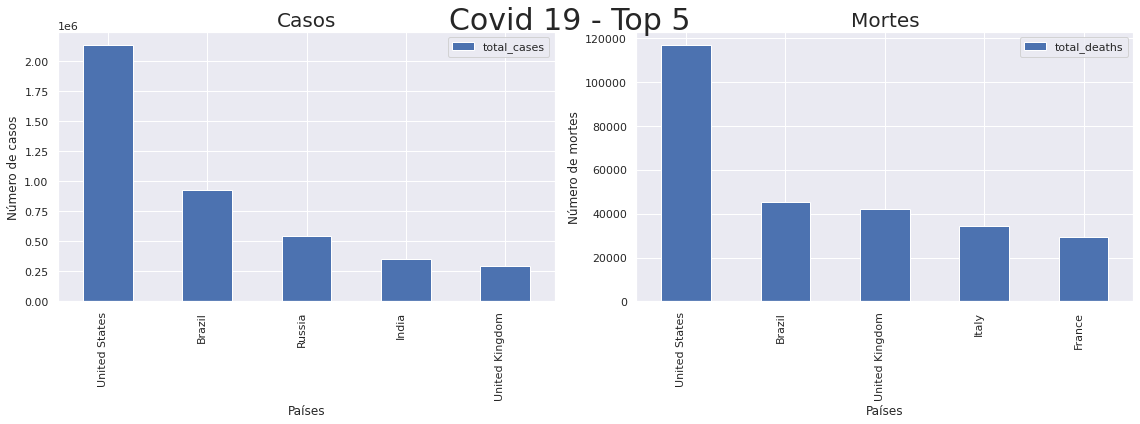

In [131]:
sns.set()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
fig.suptitle("Covid 19 - Top 5", fontsize=30)
fig.autofmt_xdate()

df_reduzido_casos.head(5).plot(x='location', y='total_cases', kind='bar', ax=ax[0])
ax[0].set_title("Casos", fontdict={'fontsize':20})
ax[0].set_xlabel("Países")
ax[0].set_ylabel("Número de casos")

df_reduzido_mortes.head(5).plot(x='location', y='total_deaths', kind='bar', ax=ax[1])
ax[1].set_title("Mortes", fontdict={'fontsize':20})
ax[1].set_xlabel("Países")
ax[1].set_ylabel("Número de mortes")

plt.tight_layout()

Vamos fazer um plot geral para verificar como foi o aumento do número de mortos no mundo todo

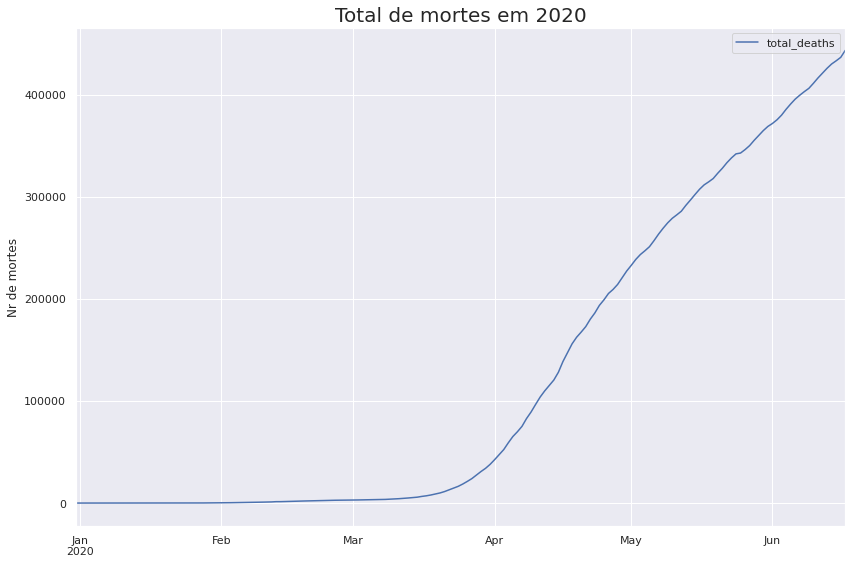

In [144]:
fig, ax = plt.subplots(figsize=(12,8))

df[['location', 'total_deaths', 'date']].loc[df.location == "World"].set_index('date').plot(ax=ax)
ax.set_title("Total de mortes em 2020", fontsize=20)
ax.set_ylabel('Nr de mortes')
ax.set_xlabel('')
plt.tight_layout()

Para finalizar nossa análise no nível mundial, vamos tentar entender como se relacionam algumas variáveis:

Antes vamoo separar um DataFrame só com as variáveis que nos interessam

In [157]:
df_analise = df[['total_deaths', 'aged_65_older', 'aged_70_older',
                 'gdp_per_capita', 'extreme_poverty','cvd_death_rate',
                 'diabetes_prevalence', 'female_smokers', 'male_smokers',
                 'handwashing_facilities', 'hospital_beds_per_thousand',
                 'life_expectancy']].loc[df.date == '2020-06-17']
(df_analise.isnull().sum().sort_values() / df_analise.shape[0]) * 100

total_deaths                   0.000000
life_expectancy                1.435407
diabetes_prevalence            8.133971
cvd_death_rate                11.483254
aged_70_older                 11.961722
aged_65_older                 12.918660
gdp_per_capita                12.918660
hospital_beds_per_thousand    21.531100
female_smokers                33.014354
male_smokers                  33.971292
extreme_poverty               42.105263
handwashing_facilities        55.980861
dtype: float64

Devido ao elevado número de valores nulos em algumas variáveis, vamos optar por não utili-las:
`handwashing_facilities` e `extreme_poverty`

O restante, vamos excluir os valores nulos e excluir os valor que se referem ao mundo todo:

In [164]:
df_analise = df[['total_deaths', 'aged_65_older', 'aged_70_older',
                 'gdp_per_capita','cvd_death_rate',
                 'diabetes_prevalence', 'female_smokers', 'male_smokers', 
                 'hospital_beds_per_thousand',
                 'life_expectancy']].loc[df.date == '2020-06-17']

df_analise.dropna(inplace=True)

df_analise = df_analise.sort_values(by='total_deaths', ascending=False).iloc[1:]


,total_deaths,aged_65_older,aged_70_older,gdp_per_capita,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
23272,116963.0,15.413,9.732,54225.446,151.089,10.79,19.1,24.6,2.77,78.86
3320,45241.0,8.552,5.060,14103.452,177.961,8.11,10.1,17.9,2.20,75.88
23102,41969.0,18.517,12.527,39753.244,122.137,4.28,20.0,24.7,2.54,81.32
11420,34405.0,23.021,16.240,35220.084,113.151,4.78,19.8,27.8,3.18,83.51
7978,29547.0,19.718,13.079,38605.671,86.060,4.77,30.1,35.6,5.98,82.66
...,...,...,...,...,...,...,...,...,...,...
22672,0.0,2.168,1.308,1697.707,213.333,2.50,3.4,16.7,0.50,63.37
3938,0.0,4.412,2.385,3645.070,270.892,4.00,2.0,33.7,0.80,69.82
7117,0.0,3.607,2.171,1510.459,311.110,6.05,0.2,11.4,0.70,66.32
22109,0.0,3.556,1.897,6570.102,335.346,6.86,6.3,78.1,5.90,69.50


Primeiramente vamos plotar uma matriz de correlação:

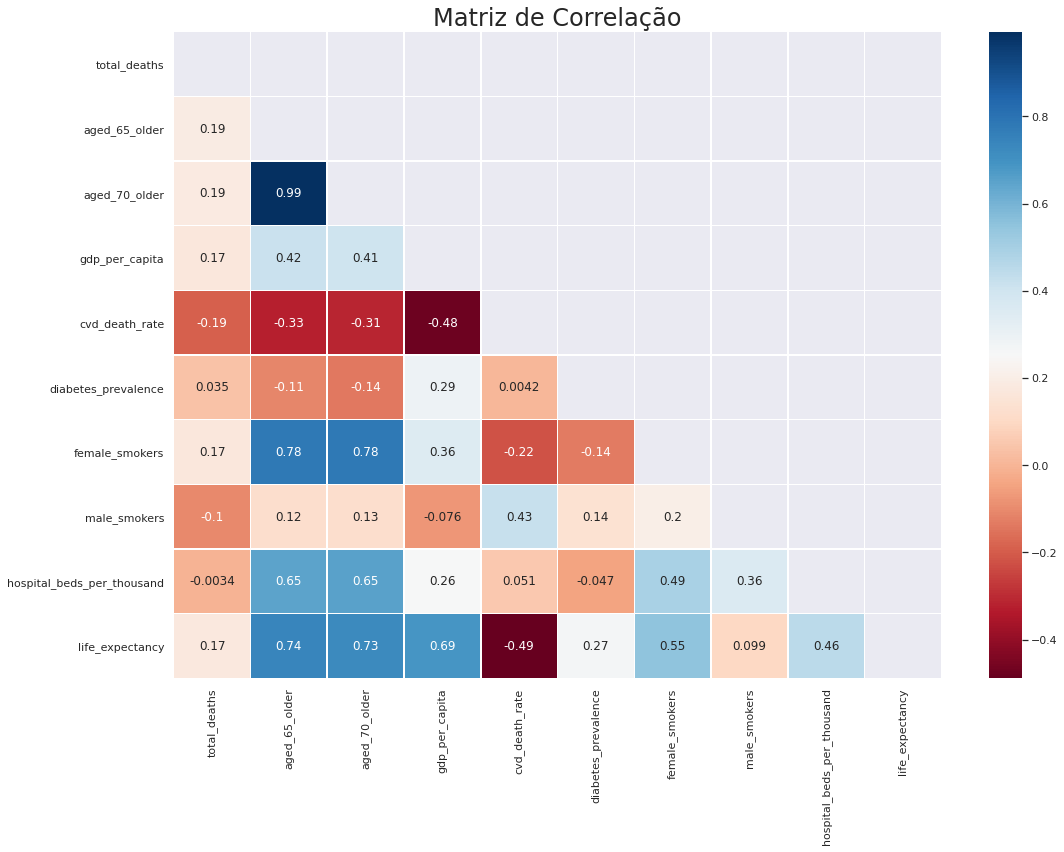

In [171]:
# plotar um heatmap a partir das correlações
corr = df_analise.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.heatmap(df_analise.corr(), cmap='RdBu', annot=True, linewidths=.5, mask=mask)
ax.set_title('Matriz de Correlação', fontsize=24)

plt.tight_layout()

E agora, vamos plotar a relação entre os gráficos de distribuição:

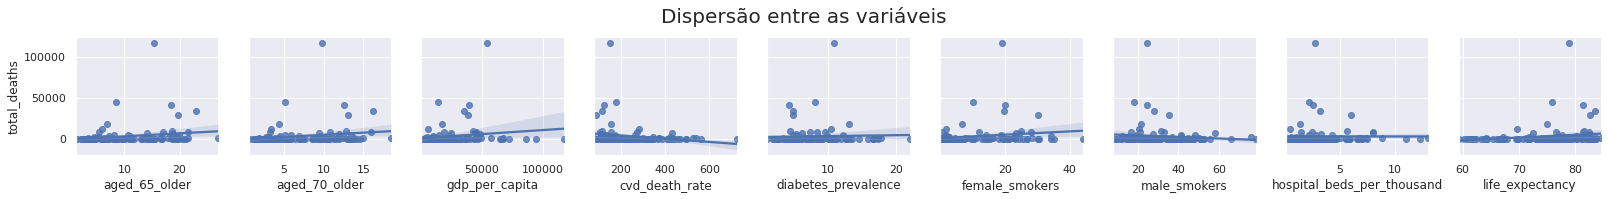

In [176]:
ax = sns.pairplot(df_analise, y_vars='total_deaths', x_vars=['aged_65_older', 'aged_70_older',
                 'gdp_per_capita','cvd_death_rate',
                 'diabetes_prevalence', 'female_smokers', 'male_smokers', 
                 'hospital_beds_per_thousand',
                 'life_expectancy'], kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.1)

plt.tight_layout()

Como podemos ver em ambos os plots, a relação entre o total de mortes e as caracteristicas da população de cada país, não podem nos fornecer nenhum valor conclusivo.

##Análise Exploratória do Brasil

Vamos agora focar nossos estudos para nosso país.

Inicialmente vamos criar uma cópia do DataFrame só com as informções do Brasil

In [177]:
df_brasil = df.loc[df.location == "Brazil"].copy()
df_brasil.set_index('date', inplace=True)

Você sabe quando foi a primeira morte de COVID-19 aqui?

Vamos descobrir:

In [188]:
# Esse foi o último dia em que não houveram mortos no Brasil.
df_brasil.query('new_deaths == 0.0').tail(1)

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-17,BRA,South America,Brazil,234.0,34.0,0.0,0.0,1.101,0.16,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.87,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


A primeira morte de COVID-19 no Brasil foi em 18
 de março de 2020

In [191]:
df_brasil = df.loc[df.location == "Brazil"].copy()
df_brasil.loc[df_brasil.date == '2020-03-18']

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3229,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


Vamos verificar agora quando foi o registrado o primeiro caso no Brasil:

In [194]:
df_brasil.query('new_cases == total_cases').tail(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
3204,BRA,South America,Brazil,2020-02-22,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3205,BRA,South America,Brazil,2020-02-23,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3206,BRA,South America,Brazil,2020-02-24,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3207,BRA,South America,Brazil,2020-02-25,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
3208,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.0,0.0,0.005,0.005,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


O primeiro caso de COVID-19 foi registrado em 26 de fevereiro de 2020.

Tivemos nossa primeira morte 22 dias após o primeiro caso

Vamos agora, analisar gráficamente o número de mortes em nosso país:

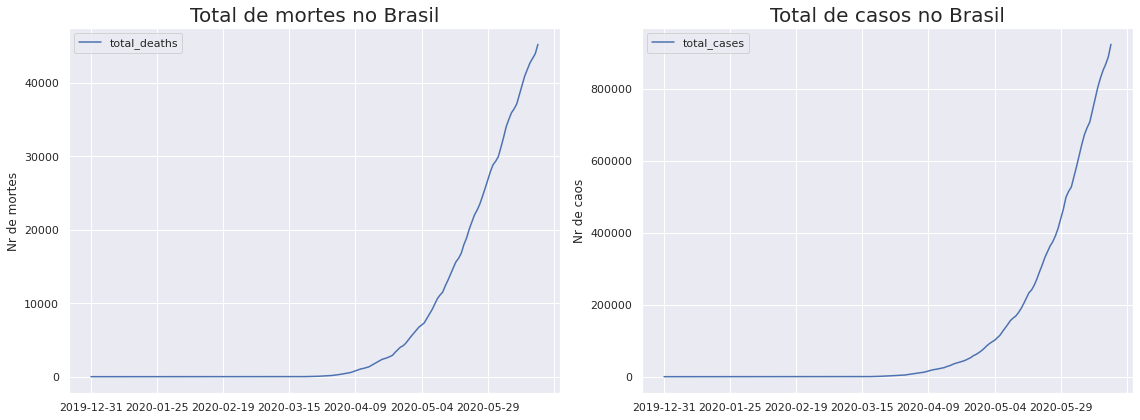

In [221]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))


df_brasil[['location', 'total_deaths', 'date']].set_index('date').plot(ax=ax[0])
ax[0].set_title("Total de mortes no Brasil", fontsize=20)
ax[0].set_ylabel('Nr de mortes')
ax[0].set_xlabel('')

df_brasil[['location', 'total_cases', 'date']].set_index('date').plot(ax=ax[1])
ax[1].set_title("Total de casos no Brasil", fontsize=20)
ax[1].set_ylabel('Nr de caos')
ax[1].set_xlabel('')

plt.tight_layout()

Vamos fazer uma análise desses mesmos valores em uma escala logarítimica:

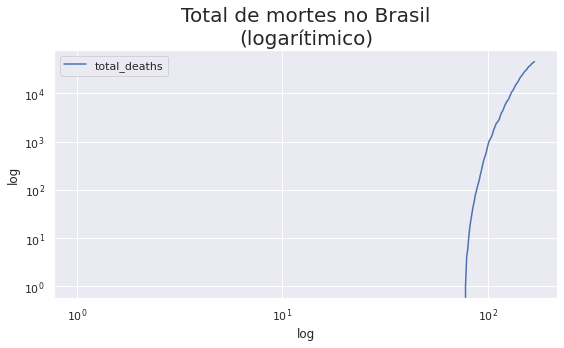

In [232]:
fig, ax = plt.subplots(figsize=(8,5))

df_brasil[['location', 'total_deaths', 'date']].set_index('date').plot(ax=ax)
ax.set_title("Total de mortes no Brasil\n(logarítimico)", fontsize=20)
ax.set_ylabel('Nr de mortes')
ax.set_xlabel('')

plt.yscale('log')
plt.ylabel('log')
plt.xscale('log')
plt.xlabel('log')

plt.tight_layout()

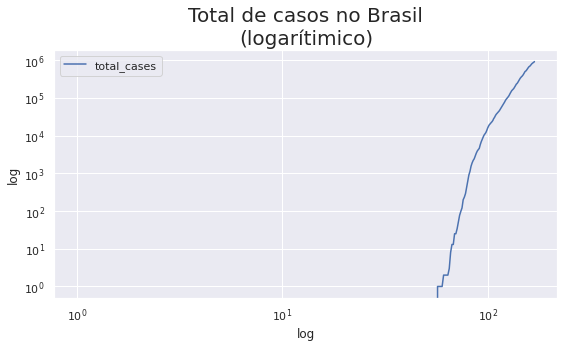

In [233]:
fig, ax = plt.subplots(figsize=(8,5))

df_brasil[['location', 'total_cases', 'date']].set_index('date').plot(ax=ax)
ax.set_title("Total de casos no Brasil\n(logarítimico)", fontsize=20)
ax.set_ylabel('Nr de casos')
ax.set_xlabel('')

plt.yscale('log')
plt.ylabel('log')
plt.xscale('log')
plt.xlabel('log')

plt.tight_layout()

Como última análise, vamos comparar a população do Brasil e o número de mortes com a população da Europa (excluíndo a Russia) e seu número de mortes.

In [260]:
df_eu_sem_russia = df.query('continent == "Europe"').loc[df.date == '2020-06-17'].sort_values(by='population', ascending=False)[1:]
print(f'A população do Europa (sem a Rússia) é de {df_eu_sem_russia.population.sum()} habitantes')
print(f'O total de mortes na Europa (sem a Russia) é de {df_eu_sem_russia.total_deaths.sum()}')

A população do Europa (sem a Rússia) é de 555816967.0 habitantes
O total de mortes na Europa (sem a Russia) é de 149236.0


In [272]:
pop_br = df_brasil.loc[df_brasil.date == '2020-06-17']['population'].sum()
mortes_br = df_brasil.loc[df_brasil.date == '2020-06-17']['total_deaths'].sum()

In [274]:
print(f'A população do Brasil é de {pop_br} habitantes')
print(f'O total de mortes no Brasil é de {mortes_br}')

A população do Brasil é de 212559409.0 habitantes
O total de mortes no Brasil é de 45241.0


## Conclusão

Finalizamos mais essa análise e, concluo da mesma forma que iniciei: os dados e forma como são reportados pelo mundo todo não são padronizados e dessa forma não queremos concluir aqui com nenhuma afirmação ou julgamento.

Nosso principal objetivo era mostrar alguns valores e tentar entender como as variáveis se comportam ou possuem alguma correlação.

Gostaria de chamar a todos para refletirem sobre nossa última análise: *nosso pais possui metade da população de toda Europa (exluindo a Rússia), mas possui menos de 1/3 do número de mortes. Talvez nosso país esteja com uma conduta eficiente no combate, uma vez que "possui melhores números" que os países desenvolvidos da Europa?*

Somente o tempo vai nos dizer como estamos indo nessa guerra, mas nesse momento, tente olhar as coisas boas e acreditar em algo maior. Antes de falar mal do seu país, o Brasil, lembre-se dessa última análise que fizemos nos comparando ao países mais desenvolvidos!

Vamos continuar lutando e acreditando!

Para acompanhar outros artigos sobre programação e Data Science, procure no meu [Linkdin](https://www.linkedin.com/in/miguel-s-machado/), ou no [GitHub](https://github.com/miguelsmachado/py_projects/blob/master/README.md) ou no [Medium](https://medium.com/@miguelsmachado).

E dessa vez, gostaria de convidar para uma outra análise do Covid-19 que já fizemos, mas dessa vez, voltada para as mídias sociais e a relação entre as pessoas com o tema COVID-19. [Leia agora!](https://medium.com/@miguelsmachado/analisando-dados-do-twitter-covid-19-04-de-junho-de-2020-8a8d2dce749)

Obrigado pela atenção! Até a próxima!